In [0]:
import pre
#pre.create_sentence_list(1)   #to access sentence, 0 for not preprocesses 1 for preprocessed
#pre.create_label(1)   # to access tag 
#pre.norm_corpus   # to access stop word removed text
#pre.num_rows   # to acess num of rows
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
corpus =  pre.create_sentence_list(1)
label = pre.create_label(0)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(lowercase=True,ngram_range=(1,2),max_features=1500)
cv_matrix = cv.fit_transform(pre.norm_corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
# get all unique words in the corpus
vocab = cv.get_feature_names()



In [0]:
new_label=[]
new_cv=[]
length = len(cv_matrix)
for i in range(0, length):
  for j in range(0,len(label[i])):
    new_cv.append(cv_matrix[i])
    new_label.append(label[i][j])

vocab = cv.get_feature_names()
df_bagofwords=pre.pd.DataFrame(pre.np.round(new_cv, 2), columns=vocab)
#df_tfidf.insert(0, "sentences", corpus)
df_bagofwords ["tag"]=new_label
df_bagofwords

ability  ablation  able  abstract  ...  written easy  wrong  zero  tag
0            0         0     0         0  ...             0      0     0  INT
1            0         0     0         0  ...             0      0     0  PDI
2            0         0     0         0  ...             0      0     0  MET
3            0         0     0         0  ...             0      0     0  RWK
4            0         0     0         0  ...             0      0     0  DAT
...        ...       ...   ...       ...  ...           ...    ...   ...  ...
20180        0         0     0         0  ...             0      0     0  MET
20181        0         0     0         0  ...             0      0     0  OAL
20182        0         0     0         0  ...             0      0     0  RES
20183        0         0     0         0  ...             0      0     0  OAL
20184        0         0     0         0  ...             0      0     0  MET

[20185 rows x 1501 columns]

In [0]:
new_tv=new_cv

In [0]:
import numpy as np
num_rows= len(new_tv)
num_colms=len(new_tv[0])
modified_tv=[]
padding=np.zeros(num_colms, dtype = int)
num_rows= len(new_tv)
for i in range(0,num_rows):
  if (i ==0):
    x=np.append(padding,new_tv[0])
    x=np.append(x,new_tv[1])
    modified_tv.append(x)

  elif(i==(num_rows-1)):
    x=np.append(new_tv[num_rows-2],new_tv[num_rows-1])
    x=np.append(x,padding)
    modified_tv.append(x)
  else:
    x=np.append(new_tv[i-1],new_tv[i])
    x=np.append(x,new_tv[i+1])
    modified_tv.append(x)

df_bagofwords=pre.pd.DataFrame(pre.np.round(modified_tv, 10))
df_bagofwords["tag"]=new_label
df_bagofwords

0  1  2  3  4  5  6  7  ...  4493  4494  4495  4496  4497  4498  4499  tag
0      0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0     0  INT
1      0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0     0  PDI
2      0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0     0  MET
3      0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0     0  RWK
4      0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0     0  DAT
...   .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   ...  ...
20180  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0     0  MET
20181  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0     0  OAL
20182  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0     0  RES
20183  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0     0  OAL
20184  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0     0  MET

[20185 rows x 4501 columns]

In [0]:
import pickle

pickle_out = open("/content/df_bagofwords1.pickle","wb")
pickle.dump(df_bagofwords, pickle_out)
pickle_out.close()

CREATING X & y

In [0]:
import numpy as np
X_df=df_bagofwords[df_bagofwords.columns[0:-1]] #X dataframe
X=X_df.to_numpy()  
y=df_bagofwords["tag"]
print(np.unique(df_bagofwords["tag"]))
class_names=np.unique(df_bagofwords["tag"])

['ABS' 'ANA' 'BIB' 'CNT' 'DAT' 'EXP' 'EXT' 'FWK' 'INT' 'MET' 'OAL' 'PDI'
 'RES' 'RWK' 'TNF']


EVEN DISTRIBUTION

In [0]:
from sklearn.model_selection import train_test_split
from collections import Counter
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_tr=y_tr.reset_index()['tag'].tolist()
print(X_tr.shape)
print(len(y_tr))

(13523, 4500)
13523


In [0]:
keys_level1=['INT', 'PDI', 'MET', 'RWK', 'DAT', 'RES', 'ANA', 'TNF', 'EXP', 'BIB', 'OAL', 'FWK', 'EXT', 'ABS', 'CNT']
keys_level2=['NULL', 'CMP', 'EMP', 'NOV', 'CLA', 'SUB', 'IMP', 'REC', 'CNT', 'PNF', 'APR']

freq_train=Counter(y_tr)
print(freq_train)
c=0
def increase(keys, freq, sen,tag,threshold):
  length=len(sen)
  for key in keys:
    
    if (freq[key] < threshold and freq[key] > 0):
      inc= int(threshold/ freq[key])
      for i in range(0,length):
        if (tag[i] == key):
          for j in range(0,inc):
            tag.append(tag[i])
            sen= np.append(sen, [sen[i]], axis=0)
            global c
            c=c+1
    global X_train
    X_train = sen
    global y_train
    y_train = tag

increase(keys_level1, freq_train, X_tr, y_tr,1500)  #change threshold value
print(Counter(y_train))

Counter({'MET': 4489, 'RWK': 1733, 'EXP': 1532, 'PDI': 1091, 'RES': 1085, 'OAL': 823, 'DAT': 738, 'INT': 596, 'ANA': 430, 'TNF': 359, 'BIB': 257, 'EXT': 170, 'CNT': 94, 'FWK': 93, 'ABS': 33})
Counter({'MET': 4489, 'DAT': 2214, 'PDI': 2182, 'RES': 2170, 'TNF': 1795, 'INT': 1788, 'RWK': 1733, 'ANA': 1720, 'OAL': 1646, 'FWK': 1581, 'BIB': 1542, 'EXP': 1532, 'EXT': 1530, 'ABS': 1518, 'CNT': 1504})


In [0]:
print(X_train.shape)
print(len(y_train))
print(c)
print(length)
print(y_train)

(28944, 4500)
28944
15421
13531
['MET', 'MET', 'MET', 'ANA', 'RES', 'MET', 'PDI', 'OAL', 'MET', 'RWK', 'EXP', 'CNT', 'MET', 'RWK', 'MET', 'EXT', 'MET', 'RWK', 'DAT', 'INT', 'EXT', 'RES', 'MET', 'MET', 'BIB', 'EXP', 'EXP', 'RWK', 'RWK', 'MET', 'MET', 'MET', 'MET', 'PDI', 'MET', 'RWK', 'MET', 'MET', 'RWK', 'ANA', 'RWK', 'MET', 'OAL', 'INT', 'DAT', 'EXT', 'EXP', 'MET', 'ANA', 'BIB', 'TNF', 'EXP', 'RES', 'RWK', 'MET', 'MET', 'OAL', 'OAL', 'MET', 'DAT', 'RES', 'MET', 'INT', 'MET', 'OAL', 'PDI', 'RWK', 'MET', 'ANA', 'MET', 'EXT', 'INT', 'ANA', 'MET', 'RWK', 'MET', 'TNF', 'MET', 'MET', 'RWK', 'BIB', 'MET', 'MET', 'RES', 'EXP', 'OAL', 'MET', 'FWK', 'MET', 'RWK', 'DAT', 'MET', 'RES', 'MET', 'MET', 'BIB', 'MET', 'MET', 'MET', 'MET', 'MET', 'MET', 'MET', 'OAL', 'MET', 'ABS', 'EXT', 'MET', 'MET', 'MET', 'MET', 'MET', 'RWK', 'RES', 'MET', 'RWK', 'ANA', 'DAT', 'OAL', 'FWK', 'EXP', 'RWK', 'MET', 'MET', 'MET', 'MET', 'MET', 'BIB', 'PDI', 'RES', 'MET', 'PDI', 'EXP', 'MET', 'ANA', 'RWK', 'MET', 'MET', '

LOGISTIC REGRESSION

In [0]:
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(class_weight='balanced',solver='liblinear')
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         ABS       0.47      0.73      0.57        11
         ANA       0.14      0.20      0.17       216
         BIB       0.16      0.20      0.18       117
         CNT       0.13      0.21      0.16        38
         DAT       0.29      0.37      0.32       351
         EXP       0.30      0.29      0.30       807
         EXT       0.09      0.10      0.10        72
         FWK       0.19      0.16      0.18        44
         INT       0.45      0.49      0.47       301
         MET       0.49      0.37      0.42      2219
         OAL       0.41      0.53      0.46       399
         PDI       0.21      0.25      0.23       519
         RES       0.32      0.42      0.36       493
         RWK       0.26      0.24      0.25       885
         TNF       0.46      0.55      0.50       190

    accuracy                           0.34      6662
   macro avg       0.29      0.34      0.31      6662
weighted avg       0.36   

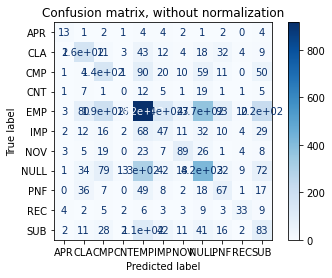

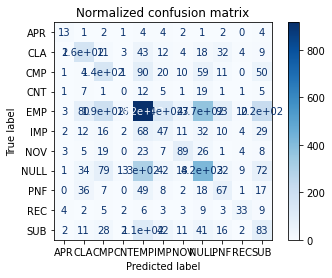

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logmodel, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

Multi nomial naive bayes

In [0]:
import sklearn.metrics as metrics
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

         ABS       0.10      0.09      0.10        11
         ANA       0.13      0.14      0.14       216
         BIB       0.21      0.18      0.19       117
         CNT       0.09      0.16      0.12        38
         DAT       0.27      0.38      0.32       351
         EXP       0.30      0.23      0.26       807
         EXT       0.03      0.01      0.02        72
         FWK       0.17      0.14      0.15        44
         INT       0.38      0.50      0.43       301
         MET       0.50      0.43      0.47      2219
         OAL       0.40      0.59      0.48       399
         PDI       0.21      0.26      0.24       519
         RES       0.30      0.34      0.32       493
         RWK       0.29      0.22      0.25       885
         TNF       0.28      0.42      0.34       190

    accuracy                           0.35      6662
   macro avg       0.24      0.27      0.25      6662
weighted avg       0.35   

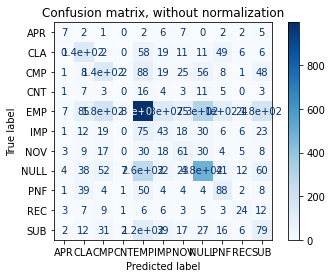

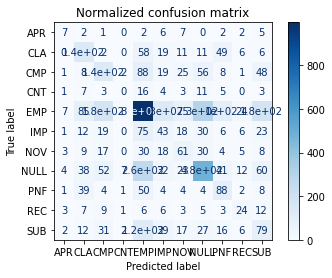

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

Random forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
clf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt',class_weight='balanced_subsample')

import sklearn.metrics as metrics
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         ABS       0.33      0.36      0.35        11
         ANA       0.31      0.15      0.20       216
         BIB       0.16      0.04      0.07       117
         CNT       0.16      0.18      0.17        38
         DAT       0.40      0.44      0.42       351
         EXP       0.43      0.23      0.30       807
         EXT       0.00      0.00      0.00        72
         FWK       0.46      0.14      0.21        44
         INT       0.58      0.41      0.48       301
         MET       0.43      0.79      0.56      2219
         OAL       0.55      0.34      0.42       399
         PDI       0.37      0.20      0.26       519
         RES       0.49      0.44      0.46       493
         RWK       0.44      0.12      0.19       885
         TNF       0.55      0.47      0.51       190

    accuracy                           0.44      6662
   macro avg       0.38      0.29      0.31      6662
weighted avg       0.43   

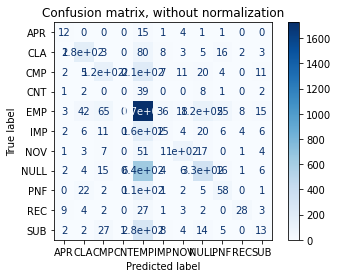

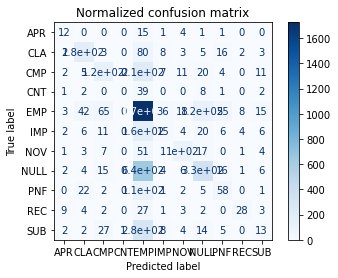

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

SVM

In [0]:
from sklearn import svm
clf = svm.SVC(class_weight='balanced',decision_function_shape='ovo')
import sklearn.metrics as metrics
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

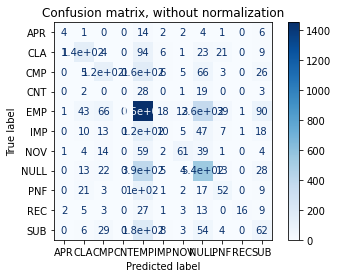

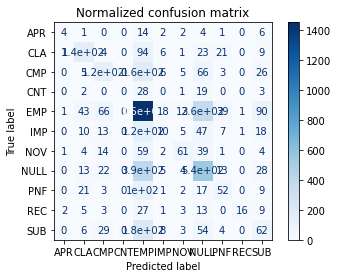

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

DECISION TREE

In [0]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
clf = DecisionTreeClassifier()

import sklearn.metrics as metrics
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         ABS       0.44      0.36      0.40        11
         ANA       0.17      0.14      0.16       216
         BIB       0.12      0.09      0.11       117
         CNT       0.10      0.26      0.14        38
         DAT       0.35      0.37      0.36       351
         EXP       0.32      0.31      0.32       807
         EXT       0.02      0.01      0.02        72
         FWK       0.12      0.07      0.09        44
         INT       0.42      0.35      0.38       301
         MET       0.45      0.53      0.49      2219
         OAL       0.37      0.34      0.35       399
         PDI       0.23      0.20      0.21       519
         RES       0.40      0.36      0.38       493
         RWK       0.31      0.28      0.30       885
         TNF       0.45      0.41      0.43       190

    accuracy                           0.37      6662
   macro avg       0.29      0.27      0.28      6662
weighted avg       0.36   

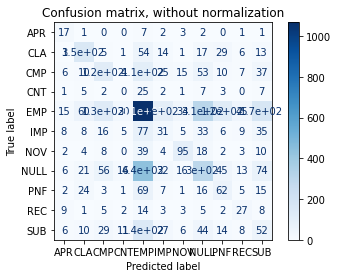

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

plt.show()

Support vector

LOGISTIC REGRESSION

In [0]:
from sklearn.linear_model import LogisticRegression

# Make a decision tree and train
clf = LogisticRegression(class_weight='balanced',solver='liblinear')

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

Logistic regression
f1 score tfidf 0.34535603540399895
recall score tfidf 0.34535603540399895
precison score tfidf 0.34535603540399895
accuracy score tfidf 0.34535603540399895


MULTI NOMIAL NB

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

Logistic regression
f1 score tfidf 0.35551104939153366
recall score tfidf 0.35551104939153366
precison score tfidf 0.35551104939153366
accuracy score tfidf 0.35551104939153366


RANDOM FOREST

In [0]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
clf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt',class_weight='balanced_subsample')

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

Logistic regression
f1 score tfidf 0.4449354766978324
recall score tfidf 0.44493547669783245
precison score tfidf 0.44493547669783245
accuracy score tfidf 0.44493547669783245


SVM

In [0]:
from sklearn import svm
clf = svm.SVC(class_weight='balanced',decision_function_shape='ovo')

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

DECISION TREE

In [0]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
clf = DecisionTreeClassifier()

from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

f1=[]
rs=[]
ps=[]
ac=[]

for train_index, test_index in kf.split(X):
 #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
 # fit model on train data
  clf.fit(X_train, y_train)
  # evaluate performance
  y_pred = clf.predict(X_test)
  f1.append(f1_score(y_test, y_pred, average='micro',zero_division=1))
  rs.append(recall_score(y_test, y_pred, average='micro',zero_division=1))
  ps.append(precision_score(y_test, y_pred, average='micro',zero_division=1))
  ac.append(accuracy_score(y_test, y_pred))
import statistics 
print("Logistic regression")
print("f1 score tfidf",statistics.mean(f1))
print("recall score tfidf",statistics.mean(ps))
print("precison score tfidf",statistics.mean(rs))
print("accuracy score tfidf",statistics.mean(ac))

Logistic regression
f1 score tfidf 0.3862760416283169
recall score tfidf 0.3862760416283169
precison score tfidf 0.3862760416283169
accuracy score tfidf 0.3862760416283169
